## How to Approach Machine Learning Projects
![](https://i.imgur.com/kKdAALX.png)

We'll explore a step-by-step process for approaching ML problems:

1. Understand the business requirements and the nature of the available data.
2. Classify the problem as supervised/unsupervised and regression/classification.
3. Download, clean & explore the data and create new features that may improve models.
4. Create training/test/validation sets and prepare the data for training ML models.
5. Create a quick & easy baseline model to evaluate and benchmark future models.
6. Pick a modeling strategy, train a model, and tune hyperparameters to achieve optimal fit.
7. Experiment and combine results from multiple strategies to get a better result.
8. Interpret models, study individual predictions, and present your findings.

In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
import os
import matplotlib
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Step 1 - Understand Business Requirements & Nature of Data

<img src="https://i.imgur.com/63XEArk.png" width="640">


Most machine learning models are trained to serve a real-world use case. It's important to understand the business requirements, modeling objectives and the nature of the data available before you start building a machine learning model.

### Understanding the Big Picture

The first step in any machine learning problem is to read the given documentation, talk to various stakeholders and identify the following:

1. What is the business problem you're trying to solve using machine learning?
2. Why are we interested in solving this problem? What impact will it have on the business?
3. How is this problem solved currently, without any machine learning tools?
4. Who will use the results of this model, and how does it fit into other business processes?
5. How much historical data do we have, and how was it collected?
6. What features does the historical data contain? Does it contain the historical values for what we're trying to predict.
7. What are some known issues with the data (data entry errors, missing data, differences in units etc.)
8. Can we look at some sample rows from the dataset? How representative are they of the entire dataset.
9. Where is the data stored and how will you get access to it?
10. ...


Gather as much information about the problem as possible, so that you're clear understanding of the objective and feasibility of the project.### Understanding the Big Picture



## Step 2 - Classify the problem as supervised/unsupervised & regression/classification

<img src="https://i.imgur.com/rqt2A7F.png" width="640">

Here's the landscape of machine learning([source](https://medium.datadriveninvestor.com/machine-learning-in-10-minutes-354d83e5922e)):

<img src="https://miro.medium.com/max/842/1*tlQwBmbL6RkuuFq8OPJofw.png" width="640">



Here are the topics in machine learning that we're studying ([source](https://vas3k.com/blog/machine_learning/)):

<img src="https://i.imgur.com/VbVFAsg.png" width="640">



### Loss Functions and Evaluation Metrics

Once you have identified the type of problem you're solving, you need to pick an appropriate evaluation metric. Also, depending on the kind of model you train, your model will also use a loss/cost function to optimize during the training process.

* **Evaluation metrics** - they're used by humans to evaluate the ML model

* **Loss functions** - they're used by computers to optimize the ML model

They are often the same (e.g. RMSE for regression problems), but they can be different (e.g. Cross entropy and Accuracy for classification problems).

See this article for a survey of common loss functions and evaluation metrics: https://towardsdatascience.com/11-evaluation-metrics-data-scientists-should-be-familiar-with-lessons-from-a-high-rank-kagglers-8596f75e58a7

## Step 3 - Download, clean & explore the data and create new features

<img src="https://i.imgur.com/0f7foe7.png" width="640">

### Downloading Data

There may be different sources to get the data:

* CSV files
* SQL databases
* Raw File URLs
* Kaggle datasets
* Google Drive
* Dropbox
* etc.

Identify the right tool/library to get the data.

For the Rossmann Store Sales prediction dataset, we'll use the `opendatasets` library. Make sure to [accept the competition rules](https://www.kaggle.com/c/rossmann-store-sales/rules) before executing the following cell.

In [6]:
import pandas as pd
store_df = pd.read_csv('/content/store.csv')
ross_df = pd.read_csv('/content/train.csv', low_memory=False)

In [7]:
ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5.0,2015-07-31,5263.0,555.0,1.0,1.0,0,1.0
1,2,5.0,2015-07-31,6064.0,625.0,1.0,1.0,0,1.0
2,3,5.0,2015-07-31,8314.0,821.0,1.0,1.0,0,1.0
3,4,5.0,2015-07-31,13995.0,1498.0,1.0,1.0,0,1.0
4,5,5.0,2015-07-31,4822.0,559.0,1.0,1.0,0,1.0
...,...,...,...,...,...,...,...,...,...
504619,310,6.0,2014-04-05,7991.0,678.0,1.0,0.0,0,0.0
504620,311,6.0,2014-04-05,5218.0,560.0,1.0,0.0,0,0.0
504621,312,6.0,2014-04-05,4321.0,448.0,1.0,0.0,0,0.0
504622,313,6.0,2014-04-05,4561.0,481.0,1.0,0.0,0,0.0


In [8]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


We can merge the two data frames to get a richer set of features for each row of the training set.

In [9]:
merged_df = ross_df.merge(store_df, how='left', on='Store')
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5.0,2015-07-31,5263.0,555.0,1.0,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5.0,2015-07-31,6064.0,625.0,1.0,1.0,0,1.0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5.0,2015-07-31,8314.0,821.0,1.0,1.0,0,1.0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5.0,2015-07-31,13995.0,1498.0,1.0,1.0,0,1.0,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5.0,2015-07-31,4822.0,559.0,1.0,1.0,0,1.0,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504619,310,6.0,2014-04-05,7991.0,678.0,1.0,0.0,0,0.0,a,c,2290.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
504620,311,6.0,2014-04-05,5218.0,560.0,1.0,0.0,0,0.0,a,c,680.0,7.0,2005.0,0,NaN,NaN,NaN
504621,312,6.0,2014-04-05,4321.0,448.0,1.0,0.0,0,0.0,d,a,11300.0,3.0,2012.0,0,NaN,NaN,NaN
504622,313,6.0,2014-04-05,4561.0,481.0,1.0,0.0,0,0.0,d,c,14160.0,NaN,NaN,0,NaN,NaN,NaN


In [10]:
merged_df.shape

(504624, 18)

The dataset also contains a test set.

In [11]:
test_df = pd.read_csv('/content/test.csv')

In [15]:
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [12]:
merged_test_df = test_df.merge(store_df, how='left', on='Store')

In [13]:
merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


### Cleaning Data

The first step is to check the column data types and identify if there are any null values.

In [14]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504624 entries, 0 to 504623
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      504624 non-null  int64  
 1   DayOfWeek                  504623 non-null  float64
 2   Date                       504623 non-null  object 
 3   Sales                      504623 non-null  float64
 4   Customers                  504623 non-null  float64
 5   Open                       504623 non-null  float64
 6   Promo                      504623 non-null  float64
 7   StateHoliday               504623 non-null  object 
 8   SchoolHoliday              504623 non-null  float64
 9   StoreType                  504624 non-null  object 
 10  Assortment                 504624 non-null  object 
 11  CompetitionDistance        503361 non-null  float64
 12  CompetitionOpenSinceMonth  344018 non-null  float64
 13  CompetitionOpenSinceYear   34

In [16]:
round(merged_df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Store,504624.0,558.62,322.01,1.0,281.0,558.0,838.0,1115.0
DayOfWeek,504623.0,4.00,2.00,1.0,2.0,4.0,6.0,7.0
Sales,504623.0,5888.79,3920.29,0.0,3810.5,5896.0,8042.0,41551.0
Customers,504623.0,637.14,469.15,0.0,410.0,616.0,843.0,5494.0
Open,504623.0,0.83,0.38,0.0,1.0,1.0,1.0,1.0
Promo,504623.0,0.39,0.49,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,504623.0,0.19,0.39,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,503361.0,5455.70,7771.25,20.0,700.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,344018.0,7.22,3.21,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,344018.0,2008.71,5.78,1900.0,2006.0,2010.0,2013.0,2015.0


In [17]:
merged_df.duplicated().sum()

0

Let's also parse the date column

In [18]:
merged_df['Date'] = pd.to_datetime(merged_df.Date)

In [19]:
merged_test_df['Date'] = pd.to_datetime(merged_test_df.Date)

In [20]:
merged_df.Date.min(), merged_df.Date.max()

(Timestamp('2014-04-05 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [21]:
merged_test_df.Date.min(), merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

### Exploratory Data Analysis and Visualization

Objectives of exploratory data analysis:

- Study the distributions of individual columns (uniform, normal, exponential)
- Detect anomalies or errors in the data (e.g. missing/incorrect values)
- Study the relationship of target column with other columns (linear, non-linear etc.)
- Gather insights about the problem and the dataset
- Come up with ideas for preprocessing and feature engineering



Let's study the distribution of the target "Sales" column

<Axes: xlabel='Sales', ylabel='Count'>

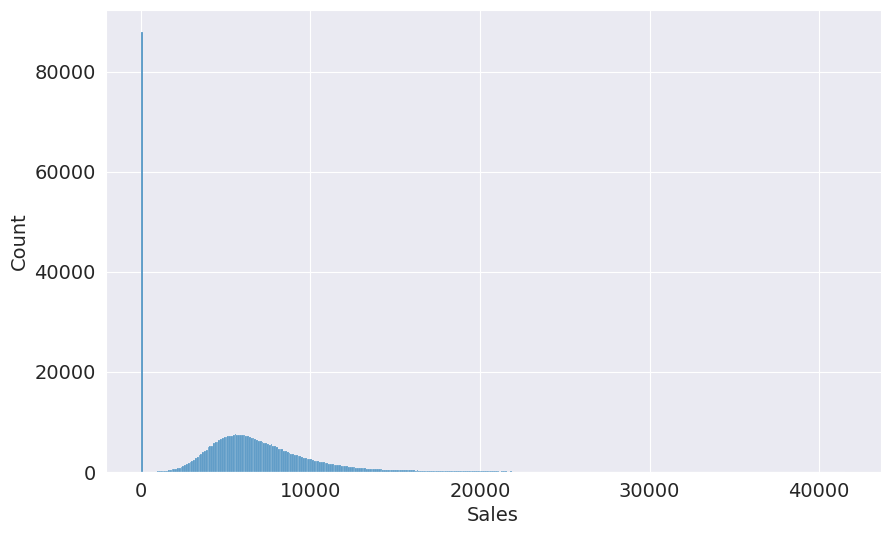

In [22]:
sns.histplot(data=merged_df, x='Sales')

Can you explain why the sales are 0 on so many dates?

Let's check if this is because the store was closed.

In [23]:
merged_df.Open.value_counts()

Open
1.0    416682
0.0     87941
Name: count, dtype: int64

In [24]:
merged_df.Sales.value_counts()[0]

87966

To make our modeling simple, let's simply exclude the dates when the store was closed (we can handle it as a special case while making predictions).

In [25]:
merged_df = merged_df[merged_df.Open==1].copy()

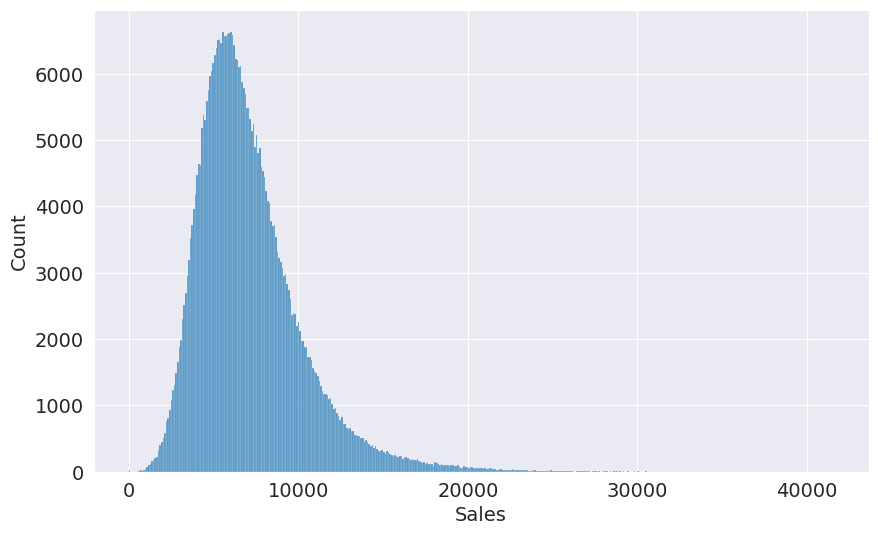

In [26]:
sns.histplot(data=merged_df, x='Sales');

Let's explore some other columns

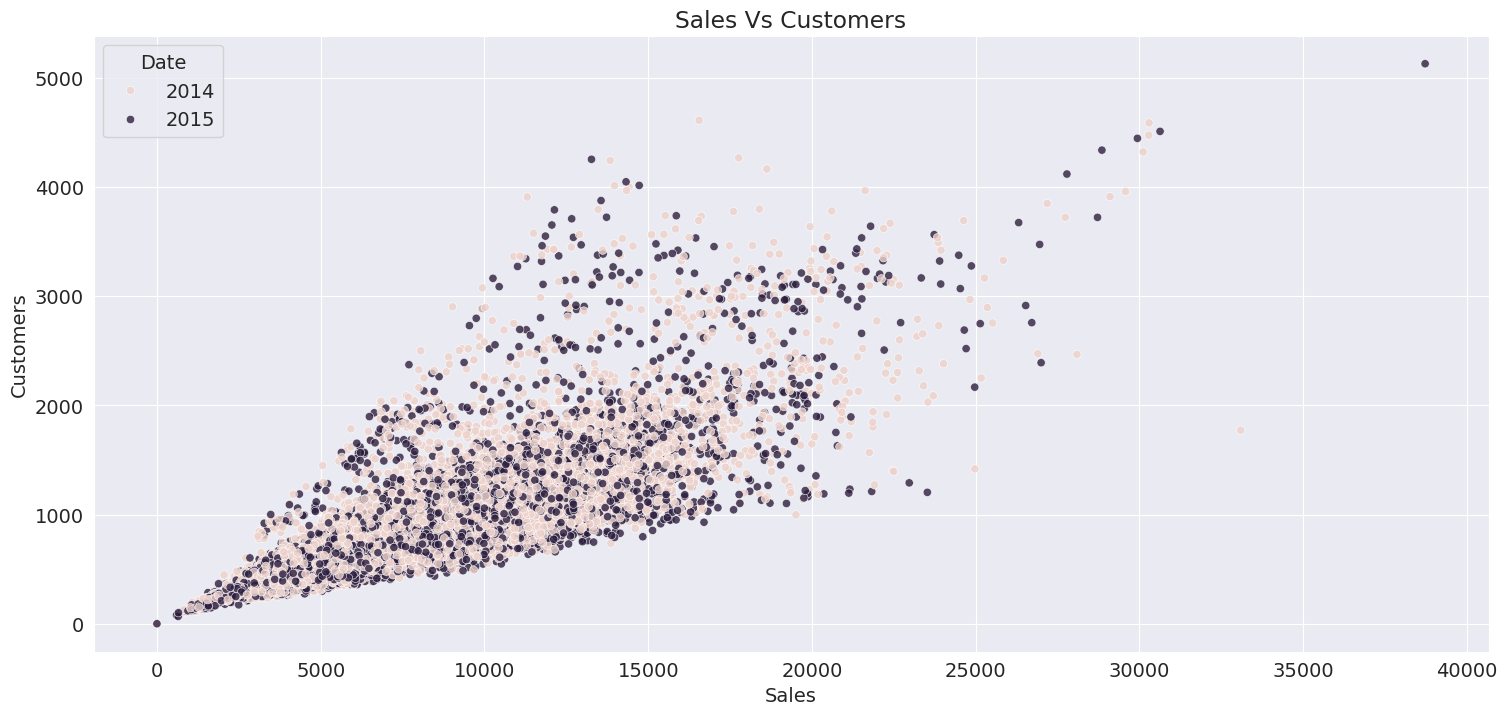

In [27]:
plt.figure(figsize=(18,8))
temp_df = merged_df.sample(40000)
sns.scatterplot(x=temp_df.Sales, y=temp_df.Customers, hue=temp_df.Date.dt.year, alpha=0.8)
plt.title("Sales Vs Customers")
plt.show()

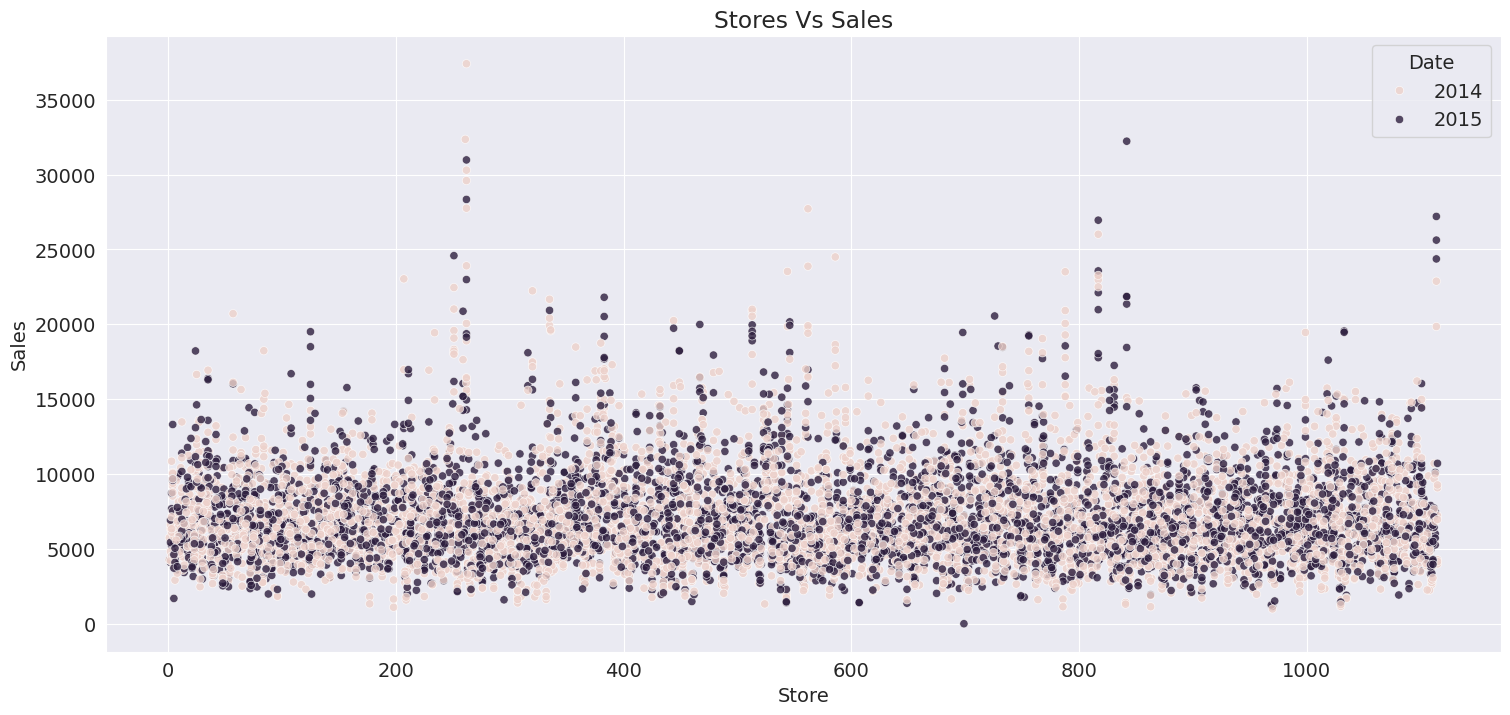

In [28]:
plt.figure(figsize=(18,8))
temp_df = merged_df.sample(10000)
sns.scatterplot(x=temp_df.Store, y=temp_df.Sales, hue=temp_df.Date.dt.year, alpha=0.8)
plt.title("Stores Vs Sales")
plt.show()

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

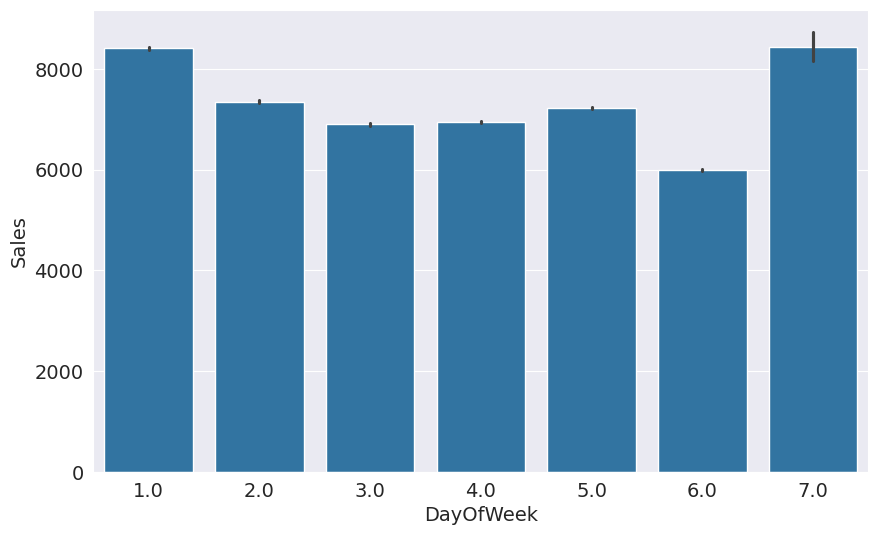

In [29]:
sns.barplot(data=merged_df, x='DayOfWeek', y='Sales')

<Axes: xlabel='Promo', ylabel='Sales'>

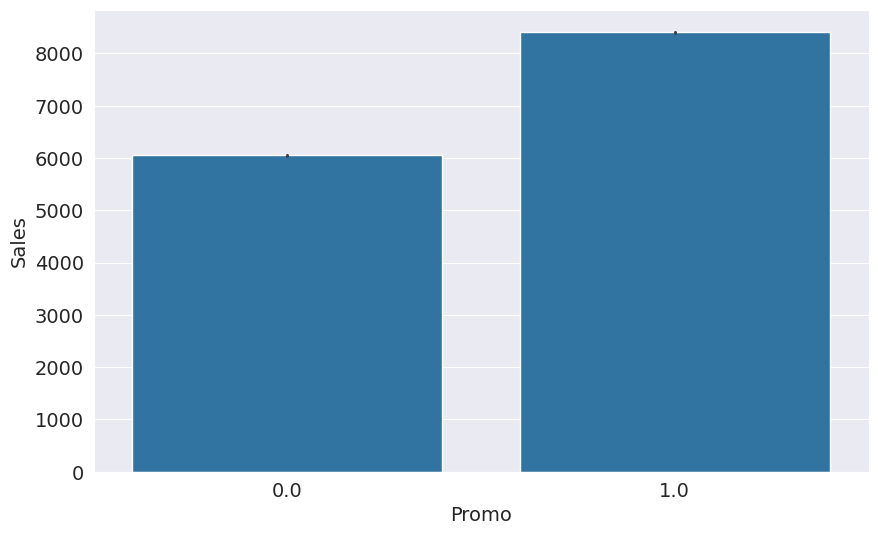

In [30]:
sns.barplot(data=merged_df, x='Promo', y='Sales')

In [41]:
merged_df.corr()['Sales'].sort_values(ascending=False)

ValueError: could not convert string to float: 'a'

### Feature Engineering

Feature engineer is the process of creating new features (columns) by transforming/combining existing features or by incorporating data from external sources.


For example, here are some features that can be extracted from the "Date" column:

1. Day of week
2. Day or month
3. Month
4. Year
5. Weekend/Weekday
6. Month/Quarter End


In [42]:
merged_df['Day'] = merged_df.Date.dt.day
merged_df['Month'] = merged_df.Date.dt.month
merged_df['Year'] = merged_df.Date.dt.year

In [43]:
merged_test_df['Day'] = merged_test_df.Date.dt.day
merged_test_df['Month'] = merged_test_df.Date.dt.month
merged_test_df['Year'] = merged_test_df.Date.dt.year

<Axes: xlabel='Year', ylabel='Sales'>

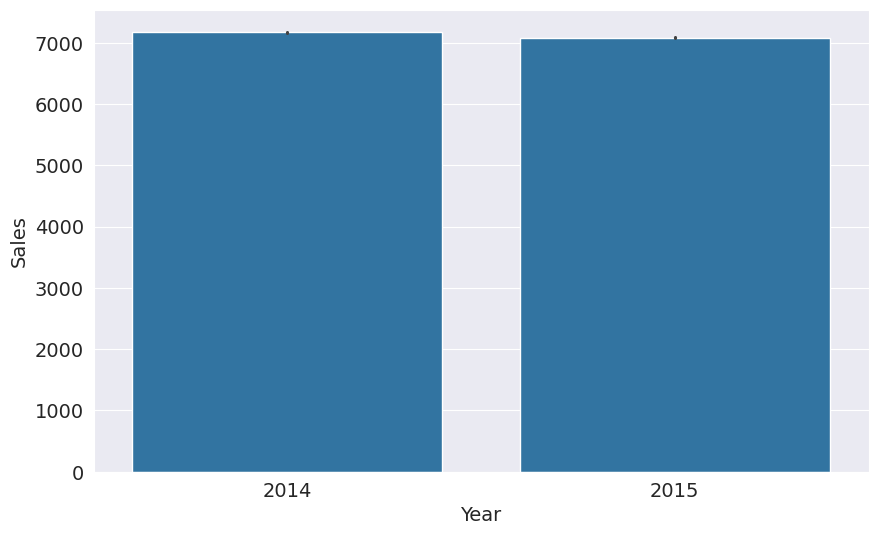

In [44]:
sns.barplot(data=merged_df, x='Year', y='Sales')

<Axes: xlabel='Month', ylabel='Sales'>

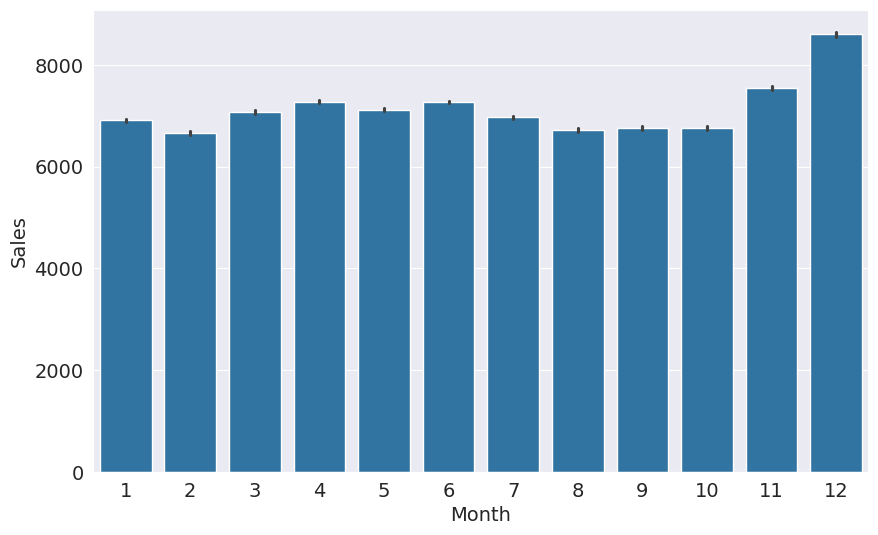

In [45]:
sns.barplot(data=merged_df, x='Month', y='Sales')



Using date information, we can also create new current columns like:

1. Weather on each day
2. Whether the date was a public holiday
3. Whether the store was running a promotion on that day.


> **EXERCISE**: Create new columns using the above ideas.

## Step 4 - Create a training/test/validation split and prepare the data for training

<img src="https://i.imgur.com/XZ9aP10.png" width="640">

### Train/Test/Validation Split

The data already contains a test set, which contains over one month of data after the end of the training set. We can apply a similar strategy to create a validation set. We'll the last 25% of rows for the validation set, after ordering by date

In [46]:
len(merged_df)

416682

In [47]:
train_size = int(.75 * len(merged_df))
train_size

312511

In [48]:
sorted_df = merged_df.sort_values('Date')
train_df, val_df = sorted_df[:train_size], sorted_df[train_size:]

In [49]:
len(train_df), len(val_df)

(312511, 104171)

In [50]:
train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
504622,313,6.0,2014-04-05,4561.0,481.0,1.0,0.0,0,0.0,d,...,14160.0,NaN,NaN,0,NaN,NaN,NaN,5,4,2014
504409,100,6.0,2014-04-05,9522.0,772.0,1.0,0.0,0,0.0,d,...,17930.0,NaN,NaN,0,NaN,NaN,NaN,5,4,2014
504410,101,6.0,2014-04-05,6782.0,747.0,1.0,0.0,0,0.0,d,...,2440.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5,4,2014
504411,102,6.0,2014-04-05,6601.0,1046.0,1.0,0.0,0,0.0,a,...,150.0,12.0,2007.0,1,10.0,2014.0,"Mar,Jun,Sept,Dec",5,4,2014
504412,103,6.0,2014-04-05,3257.0,285.0,1.0,0.0,0,0.0,d,...,5210.0,5.0,2015.0,0,NaN,NaN,NaN,5,4,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125132,253,5.0,2015-04-10,3567.0,528.0,1.0,0.0,0,1.0,a,...,250.0,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov",10,4,2015
125134,255,5.0,2015-04-10,5218.0,550.0,1.0,0.0,0,1.0,c,...,4630.0,3.0,2011.0,1,35.0,2011.0,"Feb,May,Aug,Nov",10,4,2015
125135,256,5.0,2015-04-10,6805.0,928.0,1.0,0.0,0,1.0,a,...,80.0,9.0,2005.0,1,10.0,2014.0,"Mar,Jun,Sept,Dec",10,4,2015
125136,257,5.0,2015-04-10,4496.0,568.0,1.0,0.0,0,1.0,a,...,420.0,12.0,2012.0,0,NaN,NaN,NaN,10,4,2015


In [51]:
train_df.Date.min(), train_df.Date.max()

(Timestamp('2014-04-05 00:00:00'), Timestamp('2015-04-10 00:00:00'))

In [52]:
val_df.Date.min(), val_df.Date.max()

(Timestamp('2015-04-10 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [53]:
merged_test_df.Date.min(), merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

In [54]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Day', 'Month', 'Year'],
      dtype='object')

### Input and Target columns

Let's also identify input and target columns. Note that we can't use the no. of customers as an input, because this information isn't available beforehand. Also, we needn't use all the available columns, we can start out with just a small subset.

In [55]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment', 'Day', 'Month', 'Year']

In [56]:
target_col = 'Sales'

In [57]:
merged_df[input_cols].nunique()

Store           1115
DayOfWeek          7
Promo              2
StateHoliday       4
StoreType          4
Assortment         3
Day               31
Month             12
Year               2
dtype: int64

In [58]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [59]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [60]:
test_inputs = merged_test_df[input_cols].copy()
# Test data does not have targets

In [61]:
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


Note that some columns can be treated as both numeric and categorical, and it's up to you to decide how you want to deal with them.

In [62]:
numeric_cols = ['Store', 'Day', 'Month', 'Year']
categorical_cols = ['DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment']

### Imputation, Scaling and Encode

Let's impute missing data from numeric columns and scale the values to the $(0, 1)$ range.

In [63]:
from sklearn.impute import SimpleImputer

In [64]:
imputer = SimpleImputer(strategy='mean').fit(train_inputs[numeric_cols])

In [65]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

Note that this step wasn't necessary for the store sales dataset, as there were no null values. Also, we can apply a different imputation strategy to different columns depending on their distributions (e.g. mean for normally distribute and median for exponentially distributed).

Let's also scale the values to the $(0, 1)$ range.

In [66]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
scaler = MinMaxScaler().fit(train_inputs[numeric_cols])

In [68]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

Finally, let's encode categorical columns as one-hot vectors.

In [69]:
from sklearn.preprocessing import OneHotEncoder

In [71]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [72]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

Let's now extract out the numeric data.

In [73]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

## Step 5 - Create quick & easy baseline models to benchmark future models

<img src="https://i.imgur.com/1DLgiEz.png" width="640">

A quick baseline model helps establish the minimum score any ML model you train should achieve.


### Fixed/Random Guess

Let's define a model that always returns the mean value of Sales as the prediction.

In [74]:
def return_mean(inputs):
    return np.full(len(inputs), merged_df.Sales.mean())

In [75]:
train_preds = return_mean(X_train)

In [76]:
train_preds

array([7131.62133233, 7131.62133233, 7131.62133233, ..., 7131.62133233,
       7131.62133233, 7131.62133233])

Let's evaluate this to using the RMSE score.

In [77]:
from sklearn.metrics import mean_squared_error

In [78]:
mean_squared_error(train_preds, train_targets, squared=False)

3136.0829623199857

In [97]:
mean_squared_error(return_mean(X_val), val_targets, squared=False)

3080.623651140962

The model is off by about $3000 on average.


Let's try another model, which makes a random guess between the lowest and highest sale.

In [79]:
def guess_random(inputs):
    lo, hi = merged_df.Sales.min(), merged_df.Sales.max()
    return np.random.random(len(inputs)) * (hi - lo) + lo

In [80]:
train_preds = guess_random(X_train)
train_preds

array([18780.76213937,  3151.17571755, 10062.95588149, ...,
       32856.6088199 , 38665.78199668, 19452.74565086])

In [81]:
mean_squared_error(train_preds, train_targets, squared=False)

18465.400789558476

In [82]:
mean_squared_error(guess_random(X_val), val_targets, squared=False)

18351.14263261443

### Baseline ML model

Let's train a simple `LinearRegression` model, with no customization.

In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
linreg = LinearRegression()

In [85]:
linreg.fit(X_train, train_targets)

LinearRegression()

`model.fit` uses the following workflow for training the model ([source](https://www.deepnetts.com/blog/from-basic-machine-learning-to-deep-learning-in-5-minutes.html)):

1. We initialize a model with random parameters (weights & biases).
2. We pass some inputs into the model to obtain predictions.
3. We compare the model's predictions with the actual targets using the loss function.  
4. We use an optimization technique (like least squares, gradient descent etc.) to reduce the loss by adjusting the weights & biases of the model
5. We repeat steps 1 to 4 till the predictions from the model are good enough.


<img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480">


The we have fit the model, the model can now be used to make predictions. Note that the parameters of the model will not be updated during prediction.

In [86]:
train_preds = linreg.predict(X_train)
train_preds

array([5935.36602856, 5004.95561262, 5926.24413653, ..., 6496.40667238,
       5575.20420405, 5575.24723185])

In [87]:
mean_squared_error(train_preds, train_targets, squared=False)

2774.4876709163054

In [88]:
val_preds = linreg.predict(X_val)
val_preds

array([8280.93858467, 5575.33328743, 5322.8018334 , ..., 9086.80257835,
       8885.63539656, 8133.45834896])

In [89]:
mean_squared_error(val_preds, val_targets, squared=False)

2714.5870770954766

Note that a simple linear regression model isn't much better than our fixed baseline model which always predicts the mean.

Based on the above baselines, we now know that any model we train should have ideally have a RMSE score lower than $2800. This baseline can also be conveyed to other stakeholders to get a sense of whether the range of loss makes sense.

## Step 6 - Pick a strategy, train a model & tune hyperparameters

<img src="https://i.imgur.com/aRuE5mw.png" width="640">


### Systematically Exploring Modeling Strategies

Scikit-learn offers the following cheatsheet to decide which model to pick.

![](https://scikit-learn.org/stable/_static/ml_map.png)


Here's the general strategy to follow:

- Find out which models are applicable to the problem you're solving.
- Train a basic version for each type of model that's applicable
- Identify the modeling approaches that work well and tune their hypeparameters
- [Use a spreadsheet](https://docs.google.com/spreadsheets/d/1S42lnklqdj4hS3BohffyvZVJOFBZJ61VDiHLMuf2zBw/edit?usp=sharing) to keep track of your experiments and results.

Let's define a function `try_model`, which takes a model, then performs training and evaluation.

In [90]:
def try_model(model):
    # Fit the model
    model.fit(X_train, train_targets)

    # Generate predictions
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)

    # Compute RMSE
    train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
    val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
    return train_rmse, val_rmse

### Linear Models

Read about linear models here: https://scikit-learn.org/stable/modules/linear_model.html

In [91]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor

In [92]:
try_model(LinearRegression())

(2774.4876709163054, 2714.5870770954766)

In [93]:
try_model(Ridge())

(2774.487682888875, 2714.58630497377)

In [94]:
try_model(Lasso())

(2774.642671328795, 2714.0244137151944)

In [95]:
try_model(ElasticNet())

(2920.89494910603, 2861.567314223189)

In [96]:
try_model(SGDRegressor())

(2775.2709807595597, 2713.6836447459145)

### Tree Based Models

* Decision trees: https://scikit-learn.org/stable/modules/tree.html
* Random forests and gradient boosting: https://scikit-learn.org/stable/modules/ensemble.html

In [98]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [99]:
tree = DecisionTreeRegressor(random_state=42)
try_model(tree)

(0.0, 1329.7144886820438)

Seems like the decision tree performs much better than linear models.

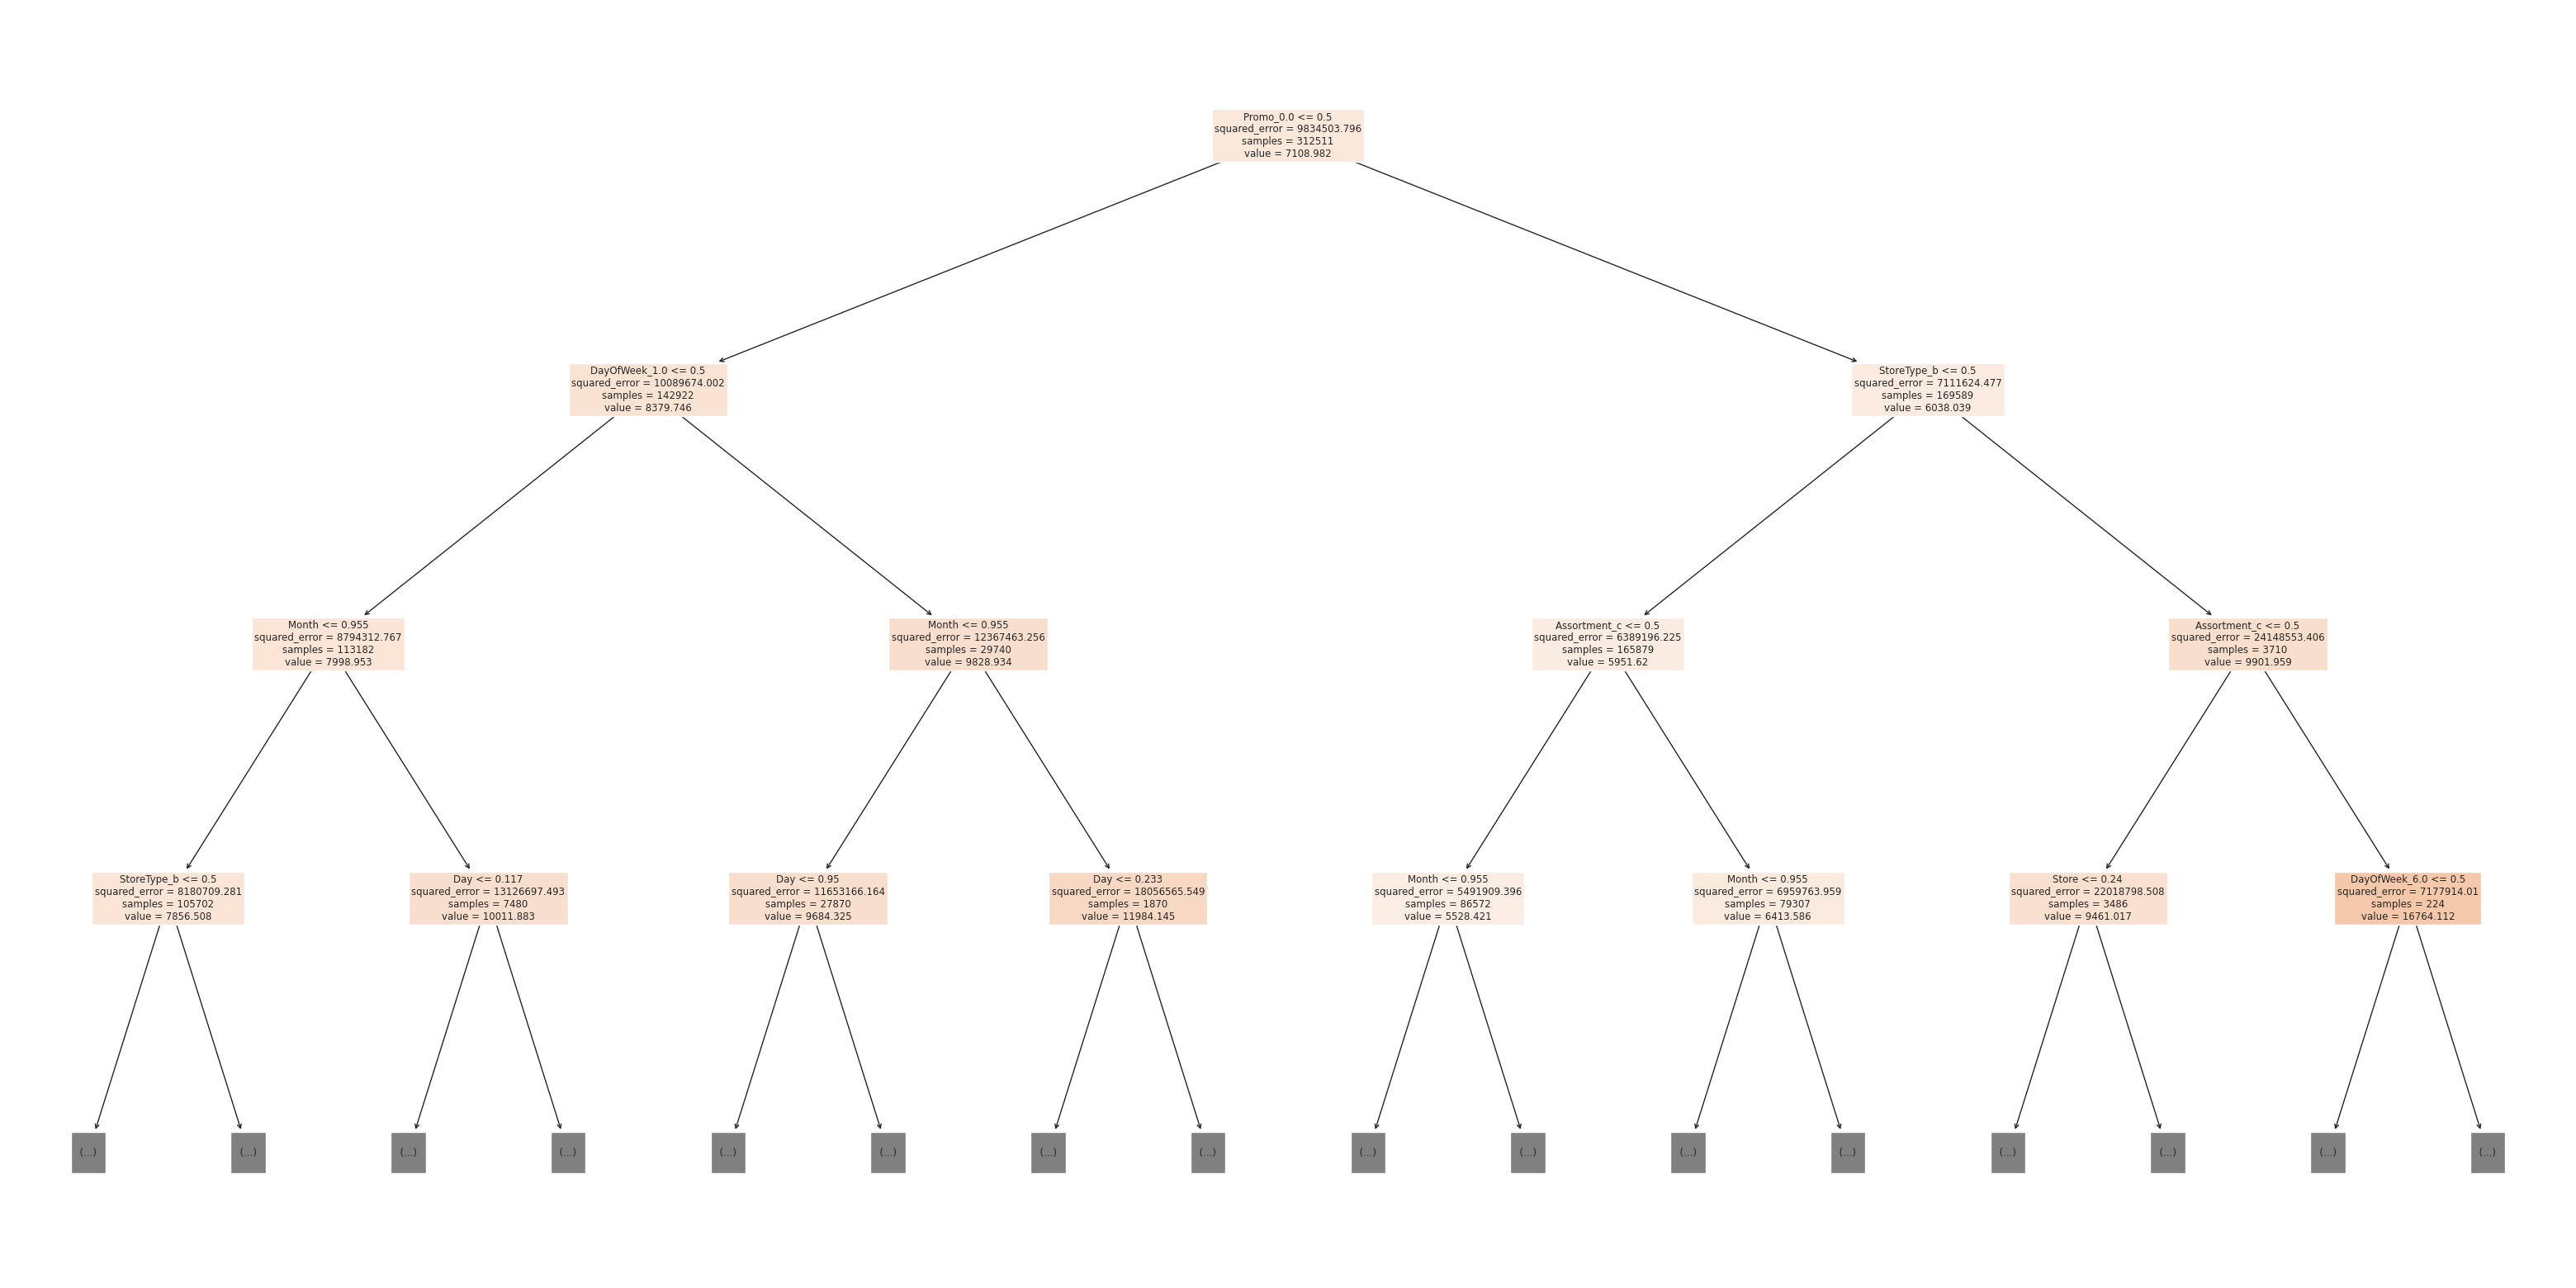

In [100]:
plt.figure(figsize=(40, 20))
plot_tree(tree, max_depth=3, filled=True, feature_names=numeric_cols+encoded_cols);

Let's try a random forest.

In [101]:
from sklearn.ensemble import RandomForestRegressor

In [102]:
%%time
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
try_model(rf)

CPU times: user 3min 38s, sys: 3.73 s, total: 3min 42s
Wall time: 2min 8s


(505.31074822337405, 1107.303566452655)

We've seen a significant reduction in the loss by using a random forest.

## Step 7 - Experiment and combine results from multiple strategies

<img src="https://i.imgur.com/ZqM6R8w.png" width="640">

In general, the following strategies can be used to improve the performance of a model:

- Gather more data. A greater amount of data can let you learn more relationships and generalize the model better.
- Include more features. The more relevant the features for predicting the target, the better the model gets.
- Tune the hyperparameters of the model. Increase the capacity of the model while ensuring that it doesn't overfit.
- Look at the specific examples where the model make incorrect or bad predictions and gather some insights
- Try strategies like grid search for hyperparameter optimization and K-fold cross validation
- Combine results from different types of models (ensembling), or train another model using their results.

### Hyperparameter Optimization & Grid Search

You can tune hyperparameters manually, our use an automated tuning strategy like random search or Grid search. Follow this tutorial for hyperparameter tuning using Grid search: https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/

<img src="https://i.imgur.com/EJCrSZw.png" width="480">

### K-Fold Cross Validation


Here's what K-fold cross validation looks like visually ([source](https://vitalflux.com/k-fold-cross-validation-python-example/)):

<img src="https://i.imgur.com/MxnzWwT.png" width="480">

Follow this tutorial to apply K-fold cross validation: https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/

### Ensembling and Stacking

Ensembling refers to combining the results of multiple models. Here's what ensembling looks like visually([source](https://www.kdnuggets.com/2019/01/ensemble-learning-5-main-approaches.html)):

<img src="https://i.imgur.com/rrOKVEd.png" width="480">


Stacking is a more advanced version of ensembling, where we train another model using the results from multiple models. Here's what stacking looks like visually ([source](https://medium.com/ml-research-lab/stacking-ensemble-meta-algorithms-for-improve-predictions-f4b4cf3b9237)):

<img src="https://i.imgur.com/VVzCWNB.png" width="400">

Here's a tutorial on stacking: https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/

## Step 8 - Interpret models, study individual predictions & present your findings

<img src="https://i.imgur.com/9axhOrA.png" width="640">

### Feature Importance

You'll need to explain why your model returns a particular result. Most scikit-learn models offer some kind of "feature importance" score.

In [106]:
X_train.columns

Index(['Store', 'Day', 'Month', 'Year', 'DayOfWeek_1.0', 'DayOfWeek_2.0',
       'DayOfWeek_3.0', 'DayOfWeek_4.0', 'DayOfWeek_5.0', 'DayOfWeek_6.0',
       'DayOfWeek_7.0', 'Promo_0.0', 'Promo_1.0', 'StateHoliday_0',
       'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c', 'StoreType_a',
       'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_a',
       'Assortment_b', 'Assortment_c'],
      dtype='object')

In [103]:
rf.feature_importances_

array([5.92382115e-01, 5.68545577e-02, 5.07399671e-02, 3.34961779e-03,
       2.69462944e-02, 4.37673936e-03, 8.03931710e-03, 2.21658744e-03,
       4.99642322e-03, 8.89952729e-03, 5.17933469e-03, 5.80411394e-02,
       8.03715833e-02, 1.70301227e-03, 2.19290316e-04, 1.05218922e-04,
       2.33694877e-05, 1.54371049e-02, 2.81319120e-02, 1.03555846e-02,
       1.32815801e-02, 1.02817654e-02, 2.16913960e-03, 1.58988183e-02])

In [104]:
importance_df = pd.DataFrame({
    'feature': numeric_cols+encoded_cols,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)

,feature,importance
0,Store,0.592382
12,Promo_1.0,0.080372
11,Promo_0.0,0.058041
1,Day,0.056855
2,Month,0.050740
18,StoreType_b,0.028132
4,DayOfWeek_1.0,0.026946
23,Assortment_c,0.015899
17,StoreType_a,0.015437
20,StoreType_d,0.013282


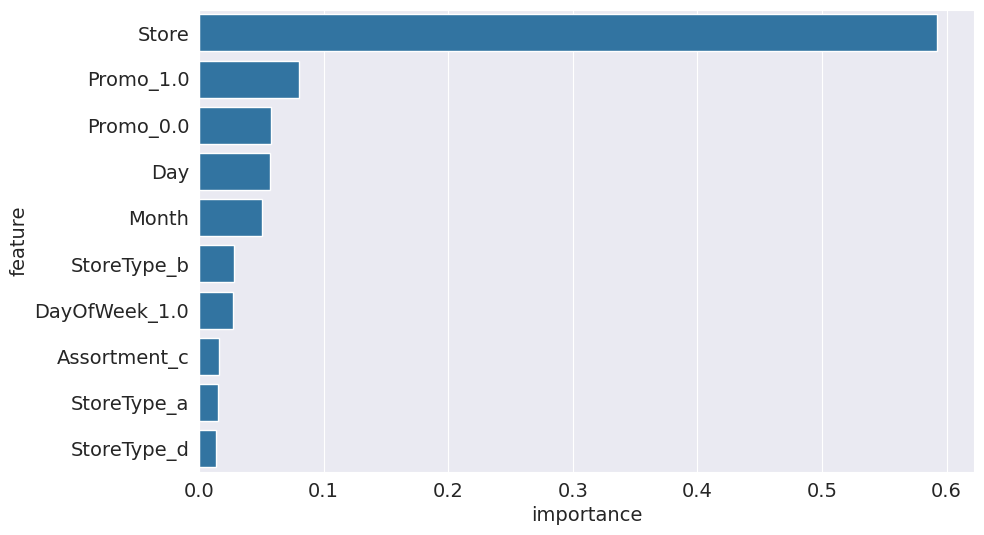

In [105]:
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

The above chart can be presented to non-technical stakeholders to explain how the model arrives at its result. For greater explainability, a single decision tree can be used.

### Looking at individual predictions

In [107]:
def predict_input(model, single_input):
    if single_input['Open'] == 0:
        return 0.
    input_df = pd.DataFrame([single_input])
    input_df['Date'] = pd.to_datetime(input_df.Date)
    input_df['Day'] = input_df.Date.dt.day
    input_df['Month'] = input_df.Date.dt.month
    input_df['Year'] = input_df.Date.dt.year
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    return pred

In [108]:
sample_input = {'Id': 1,
 'Store': 1,
 'DayOfWeek': 4,
 'Date': '2015-09-17 00:00:00',
 'Open': 1.0,
 'Promo': 1,
 'StateHoliday': '0',
 'SchoolHoliday': 0,
 'StoreType': 'c',
 'Assortment': 'a',
 'CompetitionDistance': 1270.0,
 'CompetitionOpenSinceMonth': 9.0,
 'CompetitionOpenSinceYear': 2008.0,
 'Promo2': 0,
 'Promo2SinceWeek': np.nan,
 'Promo2SinceYear': np.nan,
 'PromoInterval': np.nan}

sample_input

{'Id': 1,
 'Store': 1,
 'DayOfWeek': 4,
 'Date': '2015-09-17 00:00:00',
 'Open': 1.0,
 'Promo': 1,
 'StateHoliday': '0',
 'SchoolHoliday': 0,
 'StoreType': 'c',
 'Assortment': 'a',
 'CompetitionDistance': 1270.0,
 'CompetitionOpenSinceMonth': 9.0,
 'CompetitionOpenSinceYear': 2008.0,
 'Promo2': 0,
 'Promo2SinceWeek': nan,
 'Promo2SinceYear': nan,
 'PromoInterval': nan}

In [109]:
predict_input(rf, sample_input)

4289.17

Look at various examples from the training, validation and test sets to decide if you're happy with the result of your model.

### Presenting your results

* Create a presentation for non-technical stakeholders
* Understand your audience - figure out what they care about most
* Avoid showing any code or technical jargon, include visualizations
* Focus on metrics that are relevant for the business
* Talk about feature importance and how to interpret results
* Explain the strengths and limitations of the model
* Explain how the model can be improved over time

### Making a submission on Kaggle

If you're participating in a Kaggle competition, you can generate a submission CSV file and make a submission to check your score on the test set.

In [110]:
test_preds = rf.predict(X_test)
test_preds

array([ 4289.17,  7649.77,  8810.69, ...,  6260.68, 21210.35,  7652.54])

In [ ]:
submission_df = pd.read_csv('./rossmann-store-sales/sample_submission.csv')

In [ ]:
submission_df['Sales'] = test_preds * test_df['Open'].astype('float')

In [ ]:
submission_df.fillna(0, inplace=True)

In [ ]:
submission_df.to_csv('submission.csv', index=None)

In [ ]:
!head submission.csv

In [ ]:
from IPython.display import FileLink

In [ ]:
FileLink('submission.csv')

## Summary and References

![](https://i.imgur.com/kKdAALX.png)

Here's the summary of the step-by-step process you should follow to approach any machine learning problem:

1. Understand the business requirements and the nature of the available data.
2. Classify the problem as supervised/unsupervised and regression/classification.
3. Download, clean & explore the data and create new features that may improve models.
4. Create training/test/validation sets and prepare the data for training ML models.
5. Create a quick & easy baseline model to evaluate and benchmark future models.
5. Pick a modeling strategy, train a model, and tune hyperparameters to achieve optimal fit.
6. Experiment and combine results from multiple strategies to get a better overall result.
7. Interpret models, study individual predictions, and present your findings.


Check out the following resources to learn more:

- https://vas3k.com/blog/machine_learning/
- https://github.com/abhishekkrthakur/approachingalmost
- https://scikit-learn.org/stable/
- https://github.com/microsoft/ML-For-Beginners